In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Problem 1: Taylor Expansion

Plot the sine function and its progressive Taylor expansion series:
$$
\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1}
$$
for $x \in [-3\pi, 3\pi]$. Plot:
1. The real function 
2. The first 4 terms of the series in the same plot. (one curve for term 1 another for term 1 and 2 and so on)
Use a different color for each curve and add a legend.
* When plotting the series, plot the ylim in [-2,2]

In [10]:
def Taylor(x, terms=1):
    func = 0
    for n in range(terms):
        func += (-1)**n/math.factorial(2*n + 1) * x ** (2*n + 1)
    return func

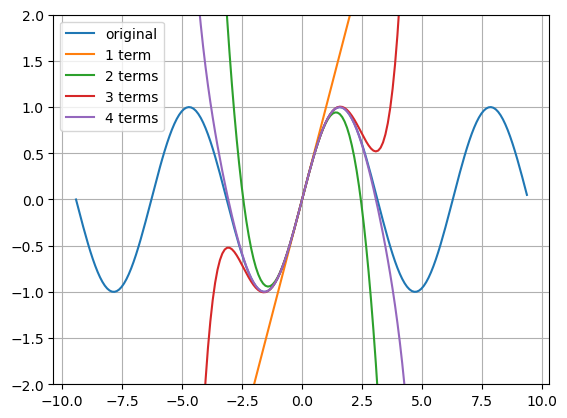

In [11]:
x = np.arange(-3*np.pi, 3*np.pi, 0.1)
y = np.sin(x)
term1 = Taylor(x, 1)
term2 = Taylor(x, 2)
term3 = Taylor(x, 3)
term4 = Taylor(x, 4)

plt.plot(x,y, label="original")
plt.plot(x,term1, label="1 term")
plt.plot(x,term2, label="2 terms")
plt.plot(x,term3, label="3 terms")
plt.plot(x,term4, label="4 terms")
plt.ylim(-2,2)
plt.legend()
plt.grid()
plt.show()

## Problem 2: The Colatz Conjecture

The Collatz conjecture is a conjecture in mathematics that concerns a sequence defined as follows: start with any positive integer n. Then each term is obtained from the previous term as follows: if the previous term is even, the next term is one half of the previous term. If the previous term is odd, the next term is 3 times the previous term plus 1. The conjecture is that no matter what value of n, the sequence will always eventually reach 1.

In other words the sequence is defined by:
$$
\begin{align}
a_1 &= n \\
a_{i+1} &= \begin{cases}
a_i/2 & \text{if } a_i \text{ is even} \\
3a_i + 1 & \text{if } a_i \text{ is odd}
\end{cases}
\end{align}
$$
After enough iterations, $a_i$ will become 1.

Write a function that receives an integer $n$ and returns the Collatz sequence up to the point where it reaches 1. Plot the sequence for a few values of $n$.

In [12]:
def Colatz(n):
    points = [n]
    while n != 1:
        if n % 2 == 0: 
            n /= 2
        else:
            n = 3 * n + 1
        points.append(n)
    return np.array(points)
            

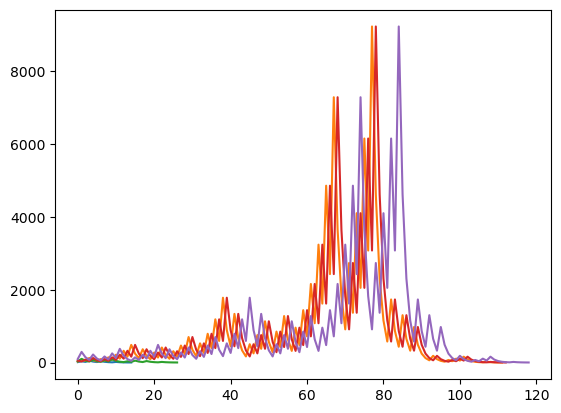

In [13]:
ns = [11, 27, 33, 54, 97] 
for n in ns:
    plt.plot(Colatz(n))
plt.show()

## Problem 3: Benford's Law

Benford's law, also called the first-digit law, is an observation about the frequency distribution of leading digits in many real-life sets of numerical data. The law states that in many naturally occurring collections of numbers, the leading digit is likely to be small. In particular, the leading digit is 1 almost one third of the time. In general, the leading digit $d$ occurs with probability:
$$
P(d) = \log_{10}\left(1 + \frac{1}{d}\right)
$$

The file `country_area.csv` contains the area of all countries in the world. Use the leading digit of the areas to test Benford's law. Plot the frequency of each leading digit and compare it to the expected frequency according to Benford's law.

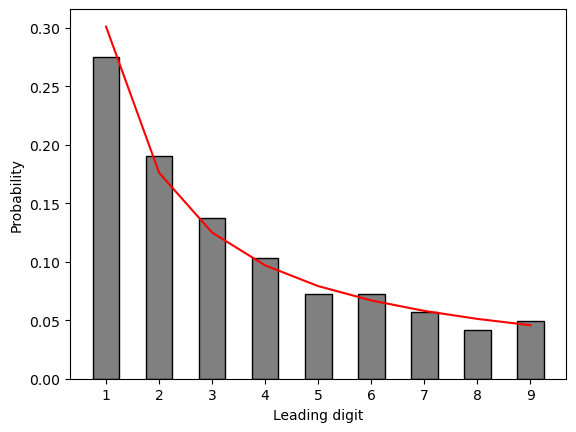

In [14]:
d = np.arange(1,10)
p = np.log10(1+1/d)

country = np.loadtxt('country_area.csv', delimiter=',', usecols=1, skiprows=1, dtype=str)
country = np.array([c[0] for c in country]).astype(np.float64)
plt.hist(country, bins=np.arange(0.5,10,1), density=True, align='mid', rwidth=0.5, color='grey', edgecolor='k')
plt.plot(np.arange(1,10), p, 'r')
plt.xticks(np.arange(1,10))
plt.xlabel('Leading digit')
plt.ylabel('Probability')
plt.show()

## Problem 4: Images

The file `image2.txt` contains a grayscale image. Load the image and plot it using matplotlib.

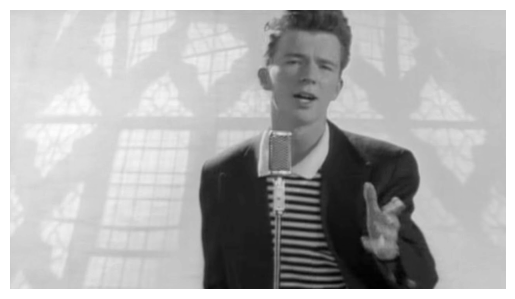

In [15]:
image = np.loadtxt('Image2.txt', delimiter=',')
plt.imshow(image, cmap='grey')
plt.axis('off')
plt.show()

## Problem 5: Rotating ball

Create an animation of a ball rotating around a circle. The ball should move in a circle of radius 1 centered at the origin. 

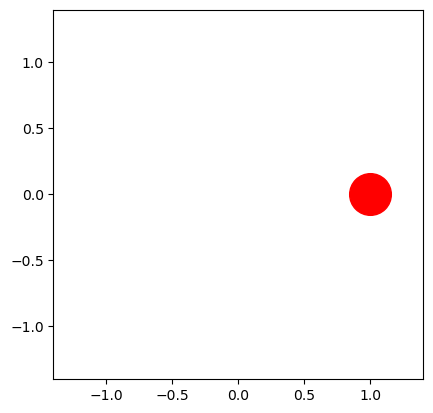

In [16]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
circle = plt.plot(0,0,'ro', ms=30)

def init():
    ax.set_xlim(-1.4,1.4)
    ax.set_ylim(-1.4,1.4)
    ax.set_aspect('equal')
    return circle

def update(frame):
    x = np.cos(frame)
    y = np.sin(frame)
    circle[0].set_data([x],[y])
    return circle

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 64), init_func=init, interval=30)
ani.save('circle.mp4', writer='ffmpeg', fps=30)
ani.save('circle.gif', writer='ffmpeg', fps=30)